In [1]:
# Install and load packages ---------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

In [2]:
# Load an example dataset ---------------

url = "https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/BarPlotsCombineTwoAxes.dta"

data = pd.read_stata(url)
data


,int1mo,food_group,consumed,number_group,total_exp
0,1,,0.334486,1.508211,811.848250
1,2,,0.335640,1.483564,954.398115
2,3,,0.339691,1.529519,734.659666
3,4,,0.310178,1.525040,350.937750
4,5,,0.315730,1.380899,461.970808
...,...,...,...,...,...
139,8,veg,0.309461,1.383731,78.323235
140,9,veg,0.299935,1.372804,134.165000
141,10,veg,0.303889,1.404087,125.811346
142,11,veg,0.351746,1.547937,173.637500


In [3]:
data2 = data[data.food_group.isin(['animal', 'fruit', 'grain', 'veg', 'starch', 'processed_sugar'])]
data2


,int1mo,food_group,consumed,number_group,total_exp
12,1,animal,0.295367,2.362934,656.340154
13,2,animal,0.211058,1.688462,465.187635
14,3,animal,0.200307,1.602459,359.065346
15,4,animal,0.199405,1.595238,192.150500
16,5,animal,0.245122,1.960976,377.907981
...,...,...,...,...,...
139,8,veg,0.309461,1.383731,78.323235
140,9,veg,0.299935,1.372804,134.165000
141,10,veg,0.303889,1.404087,125.811346
142,11,veg,0.351746,1.547937,173.637500


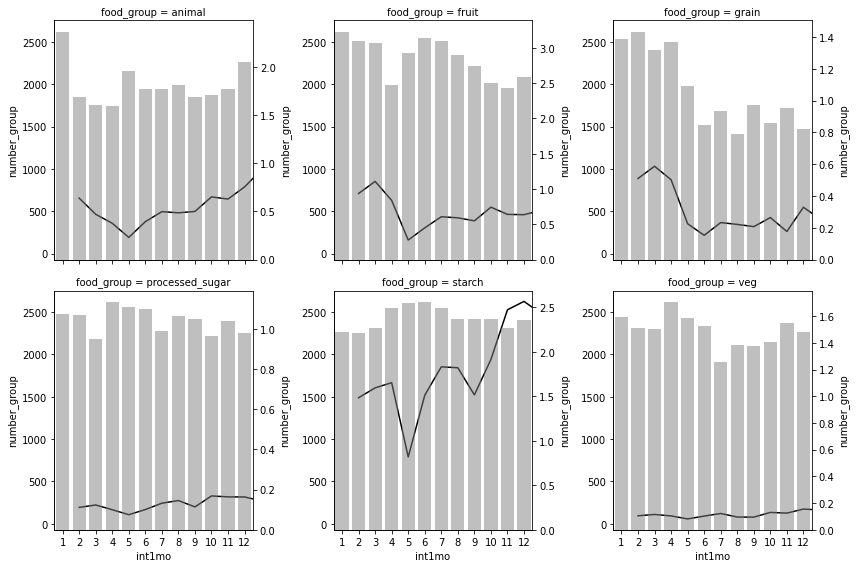

In [61]:
# Plot ---------------


def twin_barplot(x,y,color, alpha, **kwargs):
    ax = plt.twinx()
    sns.barplot(x=x,y=y,color=color,alpha = alpha, **kwargs, ax=ax)


g2 = sns.FacetGrid(data2, col = "food_group", height=4, col_wrap=3)

g2.map(sns.lineplot, "int1mo", "total_exp", color = 'black')

g2.map(twin_barplot, "int1mo", "number_group", color = 'grey', alpha = 0.5)
